In [4]:
import pandas as pd
import numpy as np
pd.set_option ('display.max_columns', 200)
pd.set_option ('display.max_rows', 2000)
import scorecardpy as sc
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("cat-in-the-dat-ii/train.csv")

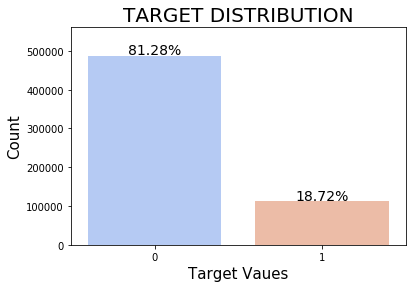

In [5]:
def plot_count_plot(target,data):
    """
    data: the data with target-column
    target: target-column name
    """
    import seaborn as sns
    g = sns.countplot(x='target', data=data, palette='coolwarm')
    g.set_title("TARGET DISTRIBUTION", fontsize = 20)
    g.set_xlabel("Target Vaues", fontsize = 15)
    g.set_ylabel("Count", fontsize = 15)
    sizes=[] # Get highest values in y
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3000,
                '{:1.2f}%'.format(height/data.shape[0]*100),
                ha="center", fontsize=14) 
    g.set_ylim(0, max(sizes) * 1.15) # set y limit based on highest heights
    plt.show()
    return g
xx=plot_count_plot("target",data)

In [6]:
'''Variable Description'''
def description(df):
    """
    Variable Description for df
    """
    print(f"Dataset Shape: {df.shape}")
    import pandas as pd
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values/df.shape[0]    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    describex=df.describe().T.merge(pd.DataFrame(df.median(),columns=['median']),left_index=True,right_index=True)
    describex=describex.reset_index().rename(columns={"index":"Name"})
    summary=summary.merge(describex,left_on="Name",right_on="Name",how="outer")
    return summary
print('**Variable Description of  train Data:**')
description(data)

**Variable Description of  train Data:**
Dataset Shape: (600000, 25)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,count,mean,std,min,25%,50%,75%,max,median
0,id,int64,0.000000,600000,0,1,2,600000.0,299999.500000,173205.225094,0.0,149999.75,299999.5,449999.25,599999.0,299999.5
1,bin_0,float64,0.029823,2,0,1,0,582106.0,0.092301,0.289451,0.0,0.00,0.0,0.00,1.0,0.0
2,bin_1,float64,0.030005,2,0,1,1,581997.0,0.185532,0.388729,0.0,0.00,0.0,0.00,1.0,0.0
3,bin_2,float64,0.029883,2,0,0,0,582070.0,0.278704,0.448362,0.0,0.00,0.0,1.00,1.0,0.0
4,bin_3,object,0.030023,2,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bin_4,object,0.030078,2,N,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,nom_0,object,0.030420,3,Red,Red,Red,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,nom_1,object,0.030260,6,Trapezoid,Star,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,nom_2,object,0.030058,6,Hamster,Axolotl,Hamster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,nom_3,object,0.030202,6,Russia,NaN,Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import category_encoders as ce
train_targets = data.target
train_features = data.drop(['target'], axis=1)
columns = [col for col in train_features.columns if col != 'id']

woe_encoder = ce.WOEEncoder(cols=columns)
woe_encoded_train = woe_encoder.fit_transform(train_features[columns], train_targets).add_suffix('_woe')
woe_encoded_train.nunique()
train_features = train_features.join(woe_encoded_train)
woe_encoded_cols = woe_encoded_train.columns

In [12]:
train_targets.shape

(600000,)

In [19]:
woe_encoded_train0=woe_encoded_train.iloc[0:420000,:]
train_targets0=train_targets[0:420000]
woe_encoded_test0=woe_encoded_train.iloc[420000:,:]
test_targets0=train_targets[420000:]

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(woe_encoded_train0, train_targets0)
print("coef of LR_fit:",lr.coef_)

coef of LR_fit: [[1.17716375 1.29789101 1.26693571 0.         1.25911377 1.19636556
  1.22574606 1.26612211 1.22955355 1.22669337 1.17296841 1.06991887
  1.20741166 1.2022782  1.17439911 1.22027261 1.20488508 1.21007125
  1.16775737 1.2022169  1.21479354 1.22704254 1.21623231]]


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


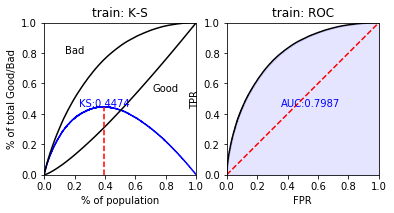

C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


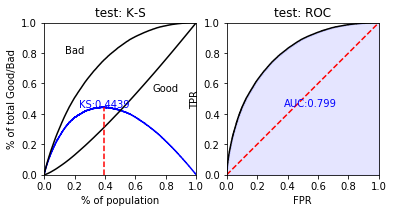

In [20]:
# predicted proability
train_pred = lr.predict_proba(woe_encoded_train0)[:,1]

# performance ks & roc ------woe_entrain_targetscoded_train
train_perf = sc.perf_eva(train_targets0, train_pred,title = "train")


# predicted proability
test_pred = lr.predict_proba(woe_encoded_test0)[:,1]

# performance ks & roc ------woe_entrain_targetscoded_train
train_perf = sc.perf_eva(test_targets0, test_pred,title = "test")

In [207]:
test=pd.read_csv('cat-in-the-dat-ii/test.csv')

In [209]:
test_woe = woe_encoder.transform(test[columns])

In [210]:
test_pred = lr.predict_proba(test_woe)[:,1]

pd.DataFrame({"id":test.id,"target":test_pred}).to_csv("cat-in-the-dat-ii/submission.csv",index=False)

In [5]:
binsx=sc.woebin(data[["nom_5","target"]],y="target")

[INFO] creating woe binning ...
>>> There are 1 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
nom_5
>>> Continue the binning process?
1: yes 
2: no
Selection: 1
Binning on 600000 rows and 2 columns in 00:01:52


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\woebin.py:731: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  binning = pd.concat(bin_list, keys=bin_list.keys()).reset_index()\


In [6]:
binsx['nom_5']['bin']

0                                              missing
1    0ce611b68%,%53554f740%,%7335087fd%,%0385d0739%...
2    4ea459c0f%,%d48b41023%,%b165c9589%,%c9a851f11%...
3    0054c0c3a%,%6a9083bc5%,%963fa2751%,%293130aba%...
4    1dde406b9%,%54b3fb00c%,%ee6876cba%,%a642fe252%...
5    f8b194adb%,%6c0d704d5%,%e424018cd%,%07648dd95%...
Name: bin, dtype: object

In [8]:
bins_cols={}
for i in range(0,len(binsx['nom_5'])):# binsx['nom_5']['bin']:
    bins_cols["bins"+str(i)]=binsx['nom_5']['bin'][i].split("%,%")

In [11]:
list(bins_cols.keys())

['bins0', 'bins1', 'bins2', 'bins3', 'bins4', 'bins5']

In [13]:
for x in list (bins_cols.keys()):
    data['nom_5'].replace(bins_cols[x],x,inplace=True)

In [15]:
binsy=sc.woebin(data[["nom_5","target"]],y="target")

[INFO] creating woe binning ...


{'nom_5': <Figure size 432x288 with 2 Axes>}

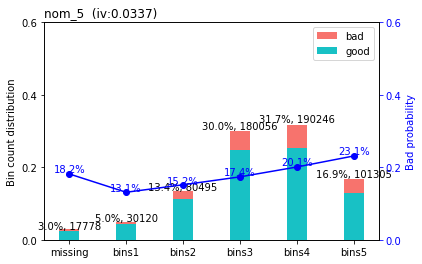

In [17]:
sc.woebin_plot(binsy)

In [85]:
xdict={}
for x in list(bins_cols.keys()):
    xdict[tuple(bins_cols[x])]=x

In [83]:
tuple(bins_cols[x])

('missing',)

{'nom_5': <Figure size 432x288 with 2 Axes>}

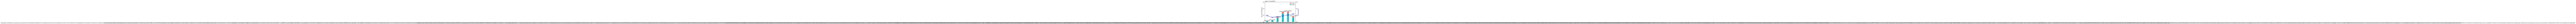

In [9]:
sc.woebin_plot(binsx)

In [23]:
bins=sc.woebin(data,y='target')

[INFO] creating woe binning ...
>>> There are 6 variables have too many unique non-numberic values, which might cause the binning process slow. Please double check the following variables: 
nom_5, nom_6, nom_7, nom_8, nom_9, ord_5
>>> Continue the binning process?
1: yes 
2: no
Selection: 1


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\woebin.py:731: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  binning = pd.concat(bin_list, keys=bin_list.keys()).reset_index()\


Binning on 600000 rows and 25 columns in 00:08:01


In [41]:
data_woe=sc.woebin_ply(data,bins)

[INFO] converting into woe values ...
Woe transformating on 600000 rows and 24 columns in 00:00:33


In [43]:
y_train = data_woe.loc[:,"target"]
X_train = data_woe.loc[:,data_woe.columns != "target"]

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train, y_train)
print("coef of LR_fit:",lr.coef_)

coef of LR_fit: [[1.19402972 0.89610324 1.19612179 1.18454279 1.19166373 1.1469098
  1.20057475 1.17517519 1.1704825  1.23478356 1.21466709 1.21782892
  1.20567783 1.14490332 1.2380795  1.05843342 1.16539155 1.19943402
  1.30940954 1.19189586 1.20066734 0.         1.20942083 1.19323327]]


C:\ProgramData\Anaconda3\lib\site-packages\scorecardpy\perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


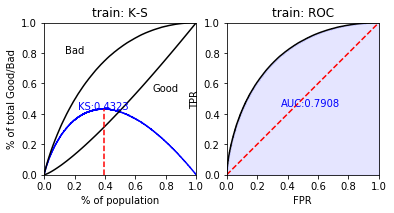

In [45]:
# predicted proability
train_pred = lr.predict_proba(X_train)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train, train_pred, title = "train")

In [52]:
test=pd.read_csv('cat-in-the-dat-ii/test.csv')

test_woe=sc.woebin_ply(test,bins)

test_woe.fillna(0,inplace=True)

test_pred = lr.predict_proba(test_woe)[:,1]

test_pred

pd.DataFrame({"id":test.id,"target":test_pred}).to_csv("cat-in-the-dat-ii/submission.csv",index=False)